# Fatima Fellowship Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. These coding challenges are not meant to take too long, do NOT spend more than 4-6 hours on them -- you can submit whatever you have.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 1. Deep Learning for Vision

**Generated by AI detector**: Train a model to detect if images are generated by AI

* Find a dataset of natural images and images generated by AI (here is one such dataset on the [Hugging Face Hub](https://huggingface.co/datasets/competitions/aiornot) but you're welcome to use any dataset you've found.
* Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify the image as being generated by an AI or not until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/datasets/sadikaljarif/fake-news-detection-dataset-english (if you'd like, you can also look at fake news datasets in other languages, which are available on the Huggingface Hub)
* Develop an NLP model for classification that uses a pretrained language model and the *text* of the article. It should *NOT* use the URL
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

##SUMMARY
The pretrained language model used for this challenge is the BertForSequenceClassification model from the Bidrectional Encoder Representation From Transformers.

Data was downloaded directly from kaggle hub using api key from kaggle.

Author: Francis-Alfred Michaelangelo

##DOWNLOAD AND IMPORT NECCESSARY LIBRARIES AND DATA

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

! pip install -q kaggle
!pip install --upgrade transformers
!pip install torch
!pip install --upgrade huggingface_hub
!pip install keras_preprocessing

from google.colab import files
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import transformers
import re, nltk, spacy, string
import gensim

from transformers import AdamW, get_linear_schedule_with_warmup, Trainer, TrainingArguments

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, precision_recall_fscore_support
from collections import defaultdict

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from collections import Counter

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
pd.options.mode.chained_assignment = None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.0 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Import kaggle api token

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mickyangelo","key":"7026b1a7de58b70aacf6366363e0d718"}'}

In [ ]:
#Prevent encoding error that stops execution of cell

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
#Download dataset from kaggle hub

!kaggle datasets download -d sadikaljarif/fake-news-detection-dataset-english

100% 41.0M/41.0M [00:03<00:00, 19.8MB/s]
100% 41.0M/41.0M [00:03<00:00, 14.1MB/s]


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Unzip data in Google Colab

!unzip -q /content/fake-news-detection-dataset-english.zip -d dataset

In [ ]:
# Unzip data in Google Drive

!unzip -q /content/fake-news-detection-dataset-english.zip -d '/content/gdrive/My Drive/ML data'

replace /content/gdrive/My Drive/ML data/Fake.csv/Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/gdrive/My Drive/ML data/True.csv/True.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/gdrive/My Drive/ML data/il_1140xN.1287758547_2nwc.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


##DATA PPREPARATION

In [ ]:
# ADD TARGET FEATURE TO BOTH FILES BASED ON THEIR FOLDER CATEGORIES

import os
import pandas as pd

def add_target_column(parent_folder):
    """
    Goes into the subfolders 'fake' and 'true' inside the parent folder,
    then loops through the 'fake.csv' and 'true.csv' files, adds a new column
    called 'target' to both files and fill the rows of the column in both files
    as 'fake' and 'true' for each file.
    """
    for subdir in ['Fake.csv', 'True.csv']:
        subdir_path = os.path.join(parent_folder, subdir)
        for file_name in os.listdir(subdir_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(subdir_path, file_name)
                df = pd.read_csv(file_path)
                df['target'] = subdir
                df.to_csv(file_path, index=False)

In [ ]:
add_target_column('/content/dataset')


In [ ]:
#Import dataset

fake_df = pd.read_csv('/content/dataset/Fake.csv/Fake.csv')
true_df = pd.read_csv('/content/dataset/True.csv/True.csv')

In [ ]:
true_df.head(5) #check first 5 rows

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True.csv
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True.csv
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True.csv
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True.csv
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True.csv


In [ ]:
fake_df.head(5) #check first 5 rows of second dataset

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake.csv
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake.csv
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake.csv
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake.csv
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake.csv


In [ ]:
news_data = pd.concat([fake_df, true_df], axis=0) #join both datasets together vertically to get a full dataset

In [ ]:
# Numerical representation of target variable

def assign_label(df):
    df["label"] = df["target"].apply(lambda x: 1 if x == "Fake.csv" else 0)
    return df

assign_label(news_data)

,title,text,subject,date,target,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake.csv,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake.csv,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake.csv,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake.csv,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake.csv,1
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True.csv,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True.csv,0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True.csv,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True.csv,0


In [ ]:
# Write the combined DataFrame to a new CSV file
news_data.to_csv('news_data.csv', index=True)

In [ ]:
news_df = pd.read_csv('news_data.csv')
news_df.head(5)

,Unnamed: 0,title,text,subject,date,target,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake.csv,1
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake.csv,1
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake.csv,1
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake.csv,1
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake.csv,1


In [ ]:
news_df = news_df[['text', 'label']]
news_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [ ]:
# Convert 'text' feature to string type

news_df['text'] = news_df['text'].astype(str)

In [ ]:
# Lower casing
news_df['lower_text'] = news_df['text'].str.lower()
news_df.head(5)

,text,label,lower_text
0,Donald Trump just couldn t wish all Americans ...,1,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",1,"on friday, it was revealed that former milwauk..."
3,"On Christmas day, Donald Trump announced that ...",1,"on christmas day, donald trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...,1,pope francis used his annual christmas day mes...


In [ ]:
# Removal of punctuations
punct_to_remove = string.punctuation

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', punct_to_remove))

news_df['removed_puncts'] = news_df['lower_text'].apply(lambda lower_text: remove_punctuations(lower_text))
news_df.head(5)

,text,label,lower_text,removed_puncts
0,Donald Trump just couldn t wish all Americans ...,1,donald trump just couldn t wish all americans ...,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",1,"on friday, it was revealed that former milwauk...",on friday it was revealed that former milwauke...
3,"On Christmas day, Donald Trump announced that ...",1,"on christmas day, donald trump announced that ...",on christmas day donald trump announced that h...
4,Pope Francis used his annual Christmas Day mes...,1,pope francis used his annual christmas day mes...,pope francis used his annual christmas day mes...


In [ ]:
# Removal of Rare Words

cnt = Counter()
n_rare_words = 10

RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rare_words(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

news_df['news_text'] = news_df['removed_puncts'].apply(lambda removed_puncts: remove_rare_words(removed_puncts))
news_df.head(5)

,text,label,lower_text,removed_puncts,news_text
0,Donald Trump just couldn t wish all Americans ...,1,donald trump just couldn t wish all americans ...,donald trump just couldn t wish all americans ...,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,1,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",1,"on friday, it was revealed that former milwauk...",on friday it was revealed that former milwauke...,on friday it was revealed that former milwauke...
3,"On Christmas day, Donald Trump announced that ...",1,"on christmas day, donald trump announced that ...",on christmas day donald trump announced that h...,on christmas day donald trump announced that h...
4,Pope Francis used his annual Christmas Day mes...,1,pope francis used his annual christmas day mes...,pope francis used his annual christmas day mes...,pope francis used his annual christmas day mes...


In [ ]:
final_df = news_df[['news_text', 'label']] #feature selection
final_df

,news_text,label
0,donald trump just couldn t wish all americans ...,1
1,house intelligence committee chairman devin nu...,1
2,on friday it was revealed that former milwauke...,1
3,on christmas day donald trump announced that h...,1
4,pope francis used his annual christmas day mes...,1
...,...,...
44893,brussels reuters nato allies on tuesday welcom...,0
44894,london reuters lexisnexis a provider of legal ...,0
44895,minsk reuters in the shadow of disused soviete...,0
44896,moscow reuters vatican secretary of state card...,0


##CHECKING FOR IMBALANCE

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'label score')

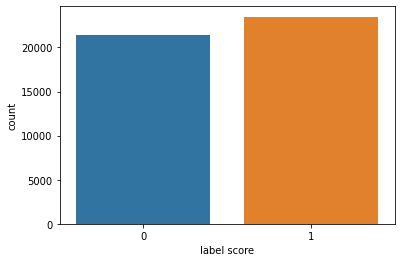

In [ ]:
# ChecK Target Distribution

ax = sns.countplot(final_df.label)
plt.xlabel('label score')

**Target distribution is useable, I do not think there is a need for target 0 upsampling yet (maybe later after initial training for optimization)**

##IMPORT PRETRAINED LANGUAGE MODEL (BERTFORSEQUENCE CLASSIFER) & TOKENIZER FROM HUGGING FACE HUB BERT.

In [ ]:
# Import PreTrained BERT

from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', force_download=True)
tokenizer.save_pretrained("./project_bert_tokenizer")

('./project_bert_tokenizer/tokenizer_config.json',
 './project_bert_tokenizer/special_tokens_map.json',
 './project_bert_tokenizer/vocab.txt',
 './project_bert_tokenizer/added_tokens.json')

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)
model.save_pretrained("./propoint_bert_model")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
tokenizer

BertTokenizer(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
#Testing tokenizer

sample_data = 'the nigerian 2023 presidency election was rigged'
tokenizer(sample_data, padding=True, truncation=True, max_length=50)

{'input_ids': [101, 1103, 11437, 2895, 1811, 17881, 1495, 11223, 1728, 1108, 25462, 3660, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

##SPLIT DATASET AND TOKENIZE

In [ ]:
X = list(final_df['news_text'])
y = list(final_df['label'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=50)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=50)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['input_ids'][0])

[101, 4374, 4665, 3113, 1110, 1164, 1112, 6276, 1112, 1126, 174, 15792, 1161, 8010, 1107, 1821, 26237, 1161, 1209, 175, 1200, 13458, 1185, 2039, 5115, 1103, 1129, 4558, 1103, 3615, 4980, 14452, 5253, 2811, 19191, 10359, 1691, 3338, 1393, 2084, 4550, 172, 22761, 1320, 1107, 24928, 2497, 1810, 1113, 102]


In [ ]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
len(X_train), len(X_val),

(35918, 8980)

##CREATE PYTORCH DATASET

In [ ]:
# Create in Torch Data

class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels=None):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    if self.labels:
      item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.encodings['input_ids'])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
(train_dataset[8])

{'input_ids': tensor([  101,  2084,  1274, 18728,   189, 27321,  1105,  1148,  5141,  1143,
         21690,  1161,   189, 27321,  2474,  1107, 21718, 17294,   170, 17952,
          1465,  1106,  4054,  1894, 10797,  3252,  1184,   170,  1632,  1236,
          1106,  3295,  1103,  2084,   188,  1148,  2880,  3868,  1115,  1209,
          1314,   130,  1552,  2217,  4121,  1348, 13516, 20190,  1118,   102]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]),
 'labels': tensor(1)}

In [ ]:
#Function for evaluation

def compute_metrics(p):
  print(type(p))

  labels = p.label_ids
  preds = p.predictions.argmax(-1)
  accuracy = accuracy_score(labels, preds)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average = 'micro')

  return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

##TRAINING & EVALUATION

In [ ]:
from transformers.training_args_tf import TFTrainingArguments
# Define Trainer

args = TrainingArguments(
    output_dir = "output",
    num_train_epochs = 5,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size = 32,
    warmup_steps = 500,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'epoch'
)

trainer = Trainer(
    model = model,
    args = args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    compute_metrics = compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 35918
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 5615
  Number of trainable parameters = 108311810


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.020000,0.012973,0.998107,0.998107,0.998107,0.998107


Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-1000
Configuration saved in output/checkpoint-1000/config.json
Model weights saved in output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.020000,0.012973,0.998107,0.998107,0.998107,0.998107
2,0.006500,0.004754,0.999443,0.999443,0.999443,0.999443
3,0.000400,0.006502,0.999220,0.999220,0.999220,0.999220
4,0.000100,0.004067,0.999555,0.999555,0.999555,0.999555
5,0.000200,0.006401,0.999220,0.999220,0.999220,0.999220


Saving model checkpoint to output/checkpoint-1500
Configuration saved in output/checkpoint-1500/config.json
Model weights saved in output/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-2000
Configuration saved in output/checkpoint-2000/config.json
Model weights saved in output/checkpoint-2000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>


Saving model checkpoint to output/checkpoint-2500
Configuration saved in output/checkpoint-2500/config.json
Model weights saved in output/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-3000
Configuration saved in output/checkpoint-3000/config.json
Model weights saved in output/checkpoint-3000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>


Saving model checkpoint to output/checkpoint-3500
Configuration saved in output/checkpoint-3500/config.json
Model weights saved in output/checkpoint-3500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-4000
Configuration saved in output/checkpoint-4000/config.json
Model weights saved in output/checkpoint-4000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>


Saving model checkpoint to output/checkpoint-4500
Configuration saved in output/checkpoint-4500/config.json
Model weights saved in output/checkpoint-4500/pytorch_model.bin
Saving model checkpoint to output/checkpoint-5000
Configuration saved in output/checkpoint-5000/config.json
Model weights saved in output/checkpoint-5000/pytorch_model.bin
Saving model checkpoint to output/checkpoint-5500
Configuration saved in output/checkpoint-5500/config.json
Model weights saved in output/checkpoint-5500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=5615, training_loss=0.01585234250239522, metrics={'train_runtime': 1795.768, 'train_samples_per_second': 100.007, 'train_steps_per_second': 3.127, 'total_flos': 4614464300010000.0, 'train_loss': 0.01585234250239522, 'epoch': 5.0})

In [ ]:
eval_result = trainer.evaluate(eval_dataset = val_dataset)
print(eval_result)

***** Running Evaluation *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>
{'eval_loss': 0.006401373073458672, 'eval_accuracy': 0.9992204899777283, 'eval_precision': 0.9992204899777283, 'eval_recall': 0.9992204899777283, 'eval_f1': 0.9992204899777283, 'eval_runtime': 24.788, 'eval_samples_per_second': 362.272, 'eval_steps_per_second': 11.336, 'epoch': 5.0}


***** Running Prediction *****
  Num examples = 8980
  Batch size = 32


<class 'transformers.trainer_utils.EvalPrediction'>


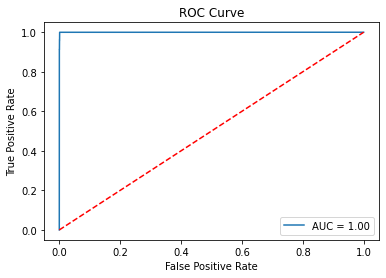

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate predictions on test dataset
predictions = trainer.predict(val_dataset)

# Calculate AUC score
auc_score = roc_auc_score(predictions.label_ids, predictions.predictions[:, 1])

# Plot ROC curve
fpr, tpr, _ = roc_curve(predictions.label_ids, predictions.predictions[:, 1])
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc_score))
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


**OBSERVATION**
- Model is a perfect one that can differentiate between fake and true news articles with almost 100% accuracy

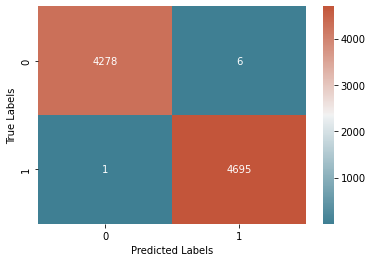

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(predictions.label_ids, predictions.predictions.argmax(-1))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap=cmap, fmt="g")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

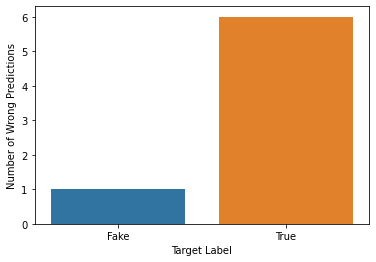

In [ ]:
#Observe missclassification distribution

fp = cm[:,1][0]
fn = cm[:,0][1]

# Generate barplot
ax = sns.barplot(x=["Fake", "True"], y=[fn, fp])
ax.set_xlabel("Target Label")
ax.set_ylabel("Number of Wrong Predictions")
plt.show()

**OBSERVATION**
- Model misclassified more from the True category than from the Fake category. This is most likely because of the data imbalance in favor of the Fake target over the True target.

##SAVE MODEL AND PUSH TO HUGGING FACE HUB

In [ ]:
trainer.save_model('CodingChallengeModel') #save trained model

Saving model checkpoint to CodingChallengeModel
Configuration saved in CodingChallengeModel/config.json
Model weights saved in CodingChallengeModel/pytorch_model.bin


In [ ]:
from huggingface_hub import notebook_login #link google colab to huggingface_hub account

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
project_model = BertForSequenceClassification.from_pretrained('/content/CodingChallengeModel')
project_tokenizer = BertTokenizer.from_pretrained('/content/project_bert_tokenizer')

loading configuration file /content/CodingChallengeModel/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file /content/CodingChallengeModel/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of Bert

In [ ]:
#Push trained model and tokenizer to huggingface_hub

project_model.push_to_hub("DataAngelo/Fatima_Fellowship_Coding_Challenge")
project_tokenizer.push_to_hub("DataAngelo/Fatima_Fellowship_Coding_Challenge")

Configuration saved in /tmp/tmpocyvsm0s/config.json
Model weights saved in /tmp/tmpocyvsm0s/pytorch_model.bin
Uploading the following files to DataAngelo/Fatima_Fellowship_Coding_Challenge: config.json,pytorch_model.bin


Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer config file saved in /tmp/tmp61f9h8p0/tokenizer_config.json
Special tokens file saved in /tmp/tmp61f9h8p0/special_tokens_map.json
Uploading the following files to DataAngelo/Fatima_Fellowship_Coding_Challenge: tokenizer_config.json,vocab.txt,special_tokens_map.json


CommitInfo(commit_url='https://huggingface.co/DataAngelo/Fatima_Fellowship_Coding_Challenge/commit/fce6a3d41dd93ac9a3d437992d5e0c09f25995e7', commit_message='Upload tokenizer', commit_description='', oid='fce6a3d41dd93ac9a3d437992d5e0c09f25995e7', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#Get Model Link

model_name = "DataAngelo/Fatima_Fellowship_Coding_Challenge"
model = BertForSequenceClassification.from_pretrained('/content/CodingChallengeModel')

# Print the link to the model
print(f"Link to model: https://huggingface.co/{model_name}")

loading configuration file /content/CodingChallengeModel/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file /content/CodingChallengeModel/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of Bert

Link to model: https://huggingface.co/DataAngelo/Fatima_Fellowship_Coding_Challenge


In [ ]:
# Get predicted labels and actual labels
pred_labels = predictions.predictions.argmax(-1)
actual_labels = predictions.label_ids

# Get indices of false positives and false negatives
fp_indices = np.where((pred_labels == 1) & (actual_labels == 0))[0]
fn_indices = np.where((pred_labels == 0) & (actual_labels == 1))[0]

# Extract the FP and FN data points
FP_data = [(i, j) for i, j in zip(fp_indices, [1]*len(fp_indices))]
FN_data = [(i, j) for i, j in zip(fn_indices, [0]*len(fn_indices))]

# Print the matrix and the individual FP and FN data points
print("False positives:")
for fp in FP_data:
    print(f"Data point {fp} was classified as Fake but is actually True.")
print()
print("False negatives:")
for fn in FN_data:
    print(f"Data point {fn} was classified as True but is actually Fake.")

False positives:
Data point (2429, 1) was classified as Fake but is actually True.
Data point (2921, 1) was classified as Fake but is actually True.
Data point (3660, 1) was classified as Fake but is actually True.
Data point (5272, 1) was classified as Fake but is actually True.
Data point (7662, 1) was classified as Fake but is actually True.
Data point (8005, 1) was classified as Fake but is actually True.

False negatives:
Data point (7094, 0) was classified as True but is actually Fake.


**Write up**: 
* Link to the model on Hugging Face Hub: [Link_To_Model](https://huggingface.co/DataAngelo/Fatima_Fellowship_Coding_Challenge)

* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

[Please put your write up here]
##ANSWER TO QUESTIONS:
From the beginning of this task, I already checked for data imbalance (refer to cell 26 within this task). Observations denotes that data is slightly imbalanced with target label "1" (Fake) on the majority side against target label "0" (True) on the minority side. Holding this observation aside and looking at the cell above, we observe that there were more FALSE POSITIVE (6) misclassification than the FALSE NEGATIVE (1) misclassification. These two observations have a relationship which is that:
- since actual target 1 is highly represented in the dataset, the model was very close to perfect in classifying it hence why false positive is just 1.
- since the actual target 0 is less represented in the dataset, the model had some issues in classifying it hence why false negative is 6.

SOLUTION: to mitigate this issue of imbalance, i would perform:
- data augmentation or
- data upsampling.

To also improve the models performance, I could play around with the hyperparameters, train on longer epochs as well. I will also look at the possibilities of performing ensembling of different language model. The potential issue i can see in doing an ensemble would be the jump in size of model which would definitely require higher computational resources.

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

[Please put your write up here]

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

[Please put your write up here]

In [ ]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?

[Please put your write up here]